<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/ClassifierTuningHyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sys
import os

#Set if running locally or in Google Col}aboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/Classifier/scripts'
    Base_path = 'Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

%load_ext autoreload
%autoreload 2

from Helpers import *
from Genotype import *
from predictions import *
from Setup import *
from CNN_Model import *
from HyperparameterTuning import *
from dataVisualization import *

['C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', 'C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', '', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Extracted_path,Partitioned_path,Prediction_path,Validation_prediction_path = setupEnvironment(Base_path,'DataStraightened.zip')

In [3]:
Genotypes = createGenotypes(Extracted_path,Partitioned_path)

3


31
76
33
Found 63 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/3
 - 4s - loss: 0.6524 - acc: 0.6420 - val_loss: 0.6595 - val_acc: 0.6515
Epoch 2/3
 - 3s - loss: 0.7122 - acc: 0.6667 - val_loss: 0.6199 - val_acc: 0.6768
Epoch 3/3
 - 3s - loss: 0.6372 - acc: 0.6667 - val_loss: 0.6039 - val_acc: 0.6667
Found 0 images belonging to 0 classes.


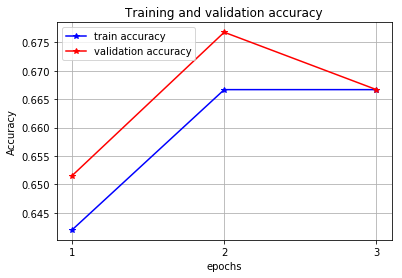

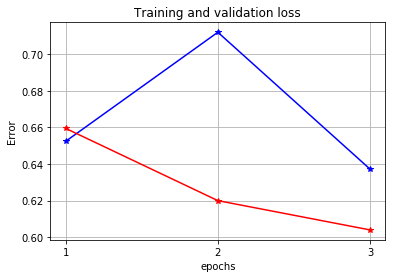

In [7]:
Tuning = False
if Tuning:

    #learning_rates = np.logspace(-7, -2, 7)
    #hidden_nodes = [4, 8, 16, 32, 64]#, 128, 256, 512, 1024]
    #input_sizes = [[75,750],[75,375], [75,150], [75,75], [50,50]]
    dropout = np.linspace(0.1, 0.99, 2)
    Plot_Xlabel = 'Dropout Rate'
    
    
    Hyperparameters = setParameters(Base_path, shapeY = 50, shapeX = 50,
                                    dropout_rate = 0,
                                    LR = 0.0001,
                                    num_nodes = 256,
                                    VGG16 = True)
    hyperparameters,Losses = Hyperparameter_tuning(Base_path,
                                                   Extracted_path,
                                                   Partitioned_path,
                                                   Genotypes,
                                                   Hyperparameters,
                                                   HypVals = dropout)
    
    cross_validation_visualization(hyperparameters,Losses[0], Losses[1],Losses[2], Losses[3],Plot_Xlabel)

else:
    #Partition data into training and test set
    #If fixed set to true, all training and test sets have the same size for all classes 
    createTrain_Test(Genotypes,0.3, fixed = True)
    
    Hyperparameters = setParameters(Base_path,
                                    shapeY = 50, shapeX = 50,
                                    dropout_rate = 0,
                                    LR = 0.0001,
                                    num_nodes = 256,
                                    VGG16 = True)
    Gen,Hist,Mdl = runModel(Partitioned_path,Genotypes,Hyperparameters,epochs=3)
    plot_loss_acc(Hist)
    
    
    #Format predictions to 4 decimal points
    float_formatter = lambda x: "%.4f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    #Predict Inages in prediction path and save predictions to a csv file
    predictionFiles, predictions = predictClass(Mdl,Prediction_path, Hyperparameters, class_mode='categorical')
    savePredictions(Base_path,predictions,predictionFiles,Hyperparameters)

